In [1]:
cd TileEM/

In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2
from TileEM_plot_toolbox import *

Populating the interactive namespace from numpy and matplotlib


In [3]:
cd step500_output/

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM/step500_output


# Optimal T  analysis : How far away are the optimal T value away from the true area as measured by the ground truth bounding box? 

In [8]:
likelihood = np.loadtxt("likelihood.txt",delimiter=',') #La,Lm,Ll,Le
La = likelihood[:,0]
Lm = likelihood[:,1]
Ll = likelihood[:,2]
Le = likelihood[:,3]
Tarea = np.loadtxt("Tarea.txt",delimiter=',') #Ta,Tm,Tl,Te
Ta = Tarea[:,0]
Tm = Tarea[:,1]
Tl = Tarea[:,2]
Te = Tarea[:,3]

In [5]:
object_lst = list(object_tbl.id)
true_area=[]
for objid in object_lst:
    my_BBG  = pd.read_csv("../../my_ground_truth.csv")
    ground_truth_match = my_BBG[my_BBG.object_id==objid]
    x_locs,y_locs =  process_raw_locs([ground_truth_match["x_locs"].iloc[0],ground_truth_match["y_locs"].iloc[0]])
    true_area.append(shapely.geometry.Polygon(zip(x_locs,y_locs)).area)
true_area=np.array(true_area)

In [11]:
def RSS(T):
    '''
    RSS against ground truth area
    '''
    return (T-true_area)**2

In [41]:
print '%.2e'%np.mean(RSS(Ta))
print '%.2e'%np.mean(RSS(Tm))
print '%.2e'%np.mean(RSS(Tl))
print '%.2e'%np.mean(RSS(Te)[~np.isnan(RSS(Te))])

1.74e+08
3.83e+08
1.71e+09
1.70e+09


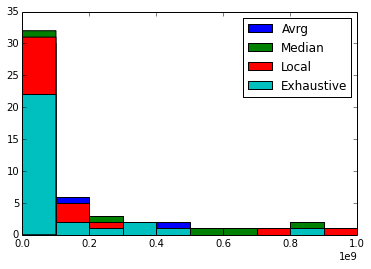

In [33]:
xmin = 0
xmax = 1e9
plt.hist(RSS(Ta),label='Avrg',range=(xmin,xmax))
plt.hist(RSS(Tm),label='Median',range=(xmin,xmax))
plt.hist(RSS(Tl),label='Local',range=(xmin,xmax))
plt.hist(RSS(Te)[~np.isnan(RSS(Te))],label='Exhaustive',range=(xmin,xmax))
plt.legend()

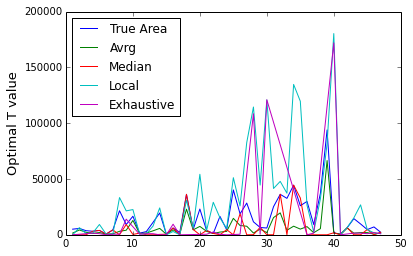

In [35]:
plt.plot(object_lst,true_area,label="True Area")
plt.plot(object_lst[:len(Ta)],interpolate_gaps(Ta),label='Avrg')
plt.plot(object_lst[:len(Ta)],interpolate_gaps(Tm),label='Median')
plt.plot(object_lst[:len(Ta)],interpolate_gaps(Tl),label='Local')
plt.plot(object_lst[:len(Ta)],interpolate_gaps(Te),label='Exhaustive')
plt.ylabel("Optimal T value",fontsize=13)
plt.legend(loc="left right")